Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock,
Germany

# Tutorial Digital Signal Processing

**DFT/IDFT Examples**,

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

Feel free to contact lecturer jacob.thoenes@uni-rostock.de

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc("xtick", labelsize=20)
plt.rc("ytick", labelsize=20)
plt.rcParams.update({"font.size": 22})
plt.rcParams["lines.linewidth"] = 4

# Definitions
π = np.pi
j = 1j

# DFT/IDFT Example 1

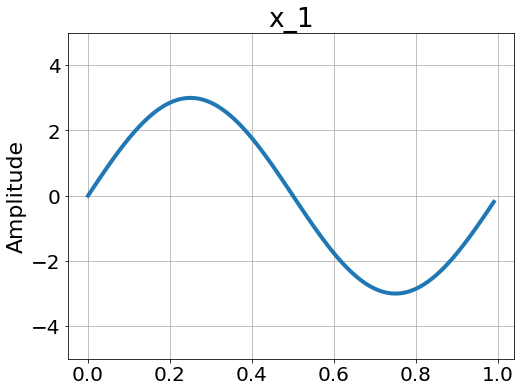

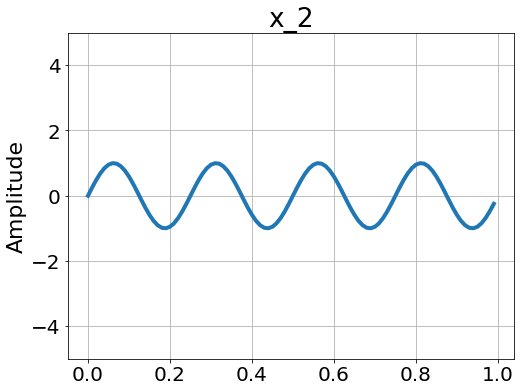

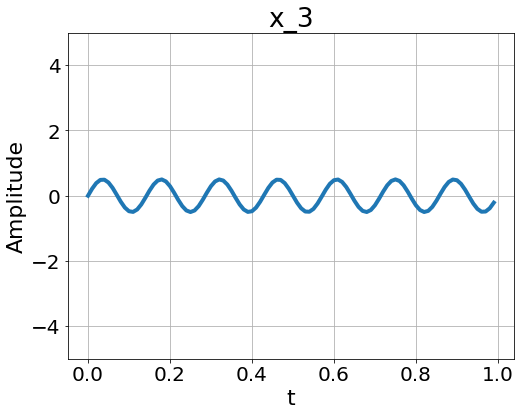

In [5]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0 / sr
t = np.arange(0, 1, ts)

# AMPLITUDE * np.sin(2 * np.pi * FREQUENCY * t)

A = 3
f = 1
x_1 = A * np.sin(2 * np.pi * f * t)

A = 1
f = 4
x_2 = A * np.sin(2 * np.pi * f * t)

A = 0.5
f = 7
x_3 = A * np.sin(2 * np.pi * f * t)

plt.figure(figsize=(8, 6))
plt.title("x_1")
plt.plot(t, x_1)
plt.ylim([-5, 5])
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.title("x_2")
plt.ylim([-5, 5])
plt.plot(t, x_2)
plt.grid(True)
plt.ylabel("Amplitude")
plt.show()

plt.figure(figsize=(8, 6))
plt.title("x_3")
plt.ylim([-5, 5])
plt.grid(True)
plt.plot(t, x_3)
plt.ylabel("Amplitude")
plt.xlabel("t")
plt.show()

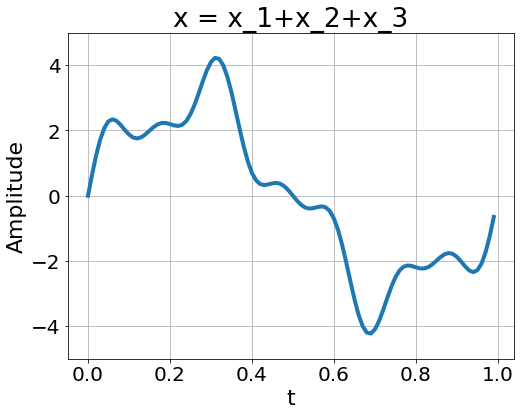

In [6]:
# Add all signals
x = x_1 + x_2 + x_3

plt.figure(figsize=(8, 6))
plt.plot(t, x)
plt.ylim([-5, 5])
plt.grid(True)
plt.title("x = x_1+x_2+x_3")
plt.ylabel("Amplitude")
plt.xlabel("t")
plt.show()

# DFT

\begin{align}
\text{DFT}: X[\mu]=&\sum_{k=0}^{N-1}x[k]\cdot\mathrm{e}^{-\mathrm{j}\frac{2\pi}{N}k\mu}\\
\end{align}

In [8]:
def DFT(x):
    """DFT"""
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * π * k * n / N)

    X = np.dot(e, x)

    return X

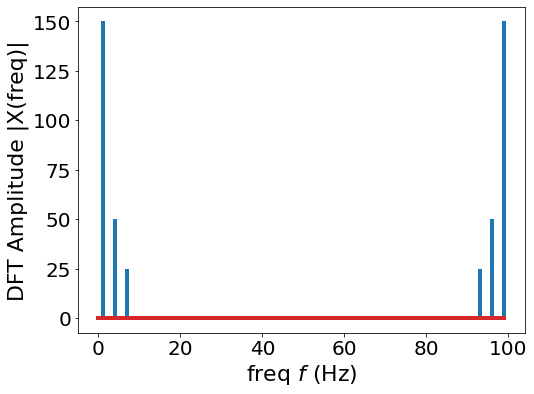

In [9]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N / sr
freq = n / T

plt.figure(figsize=(8, 6))
plt.stem(freq, abs(X), markerfmt=" ")
plt.xlabel("freq $f$ (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.show()

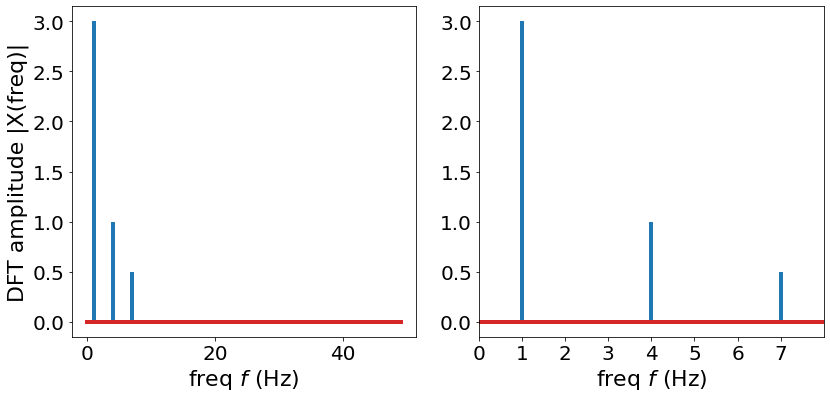

In [10]:
n_oneside = N // 2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside = X[:n_oneside] / n_oneside

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.stem(f_oneside, np.abs(X_oneside), markerfmt=" ")
plt.xlabel("freq $f$ (Hz)")
plt.ylabel("DFT amplitude |X(freq)|")

plt.subplot(122)
plt.stem(f_oneside, np.abs(X_oneside), markerfmt=" ")
plt.xlabel("freq $f$ (Hz)")
plt.xticks(np.arange(8))
plt.xlim(0, 8)
plt.tight_layout()
plt.show()

# IDFT

\begin{align}
\text{IDFT}: x[k]=\frac{1}{N}&\sum_{\mu=0}^{N-1}X[\mu]\cdot\mathrm{e}^{+\mathrm{j}\frac{2\pi}{N}k\mu}
\end{align}

In [11]:
def IDFT(x):
    """IDFT"""
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(+2j * π * k * n / N)

    x = 1 / N * np.dot(e, x)
    return x

Text(0.5, 0, 't')

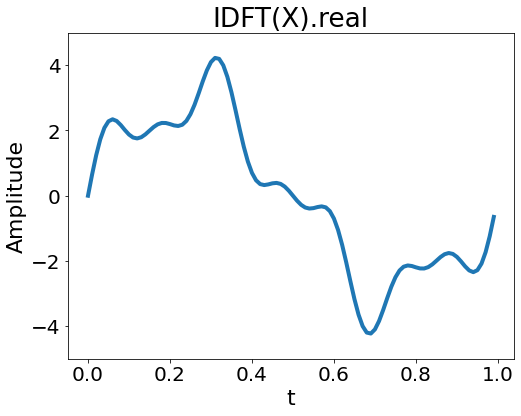

In [12]:
x = IDFT(X)

plt.figure(figsize=(8, 6))
plt.plot(t, x.real)
plt.ylim([-5, 5])
plt.title("IDFT(X).real")
plt.ylabel("Amplitude")
plt.xlabel("t")